# COGS 108 - Final Project 

# Overview

My project consisted of finding factors that contribute to the scores of health inspections and if there was a relationship between the scores and low income levels. This meant finding information about where the the most violations occurred, how consistent restaurants were in keeping up with inspections, and the location of restaurants. I acknowledge that there are other factors that possibly contribute to health inspection scores, but these are the ones I focused for this project. The bigger cities are populated with more people, which I believed that these areas were the ones with the most health code violations because it would be harder for restaurants to keep up with many people. With families that I have lower incomes, they would be surrounded with restaurants that also had lower health scores. This can help Health Departments locate what areas to focus on first. 

I went through data that I found was useful from inspections, restaurants, violations, and zipcodes csv files. I organized what data I needed, dropped values that did not correspond, and merged dataframes into one. 

# Name & PID

- Name: Anahi Fajardo
- Github: a2fajard

# Research Question

**What is the relationship between health inspections and the location of restaurants?**

## Background and Prior Work

Health inspections are given to businesses that are selling food in order to ensure that business are following the proper safe food handling procedures. Not just anyone does the health inspections, but those from the State and/or Local Health Departments. Each state or city has their own health department and guidelines. According to Webstaurantstore, the most common health code violations are: food safety temperatures, improper food storage, poor personal hygiene, poor kitchen sanitation, and cross contamination. At the end of the inspection, the points are scored on a 100 point scale and a letter grade.  


Restaurants are inspected once to 3 times a year, depending on how the conditions are. This can be up to evert 4 months. In this project, if health scores are good, their previous inspection dates should be high. To avoid getting a violation, restaurants go through different trainings from how to properly store food, to serving food, to personal hygiene. 

I will be able to explore more on the factors that influence the health inspection scores.

References (include links):
- 1) Webstaurant: https://www.webstaurantstore.com/article/16/health-inspection-checklist.html#:~:text=Health%20inspections%20are%20held%20to,inspections%20become%20a%20routine%20experience.
- 2) County of Los Angeles Public Health: http://www.publichealth.lacounty.gov/eh/SSE/DESFAQ.htm
- 3) Ryan Gromfin: https://pos.toasttab.com/blog/on-the-line/restaurant-health-code-violations

# Hypothesis


Restaurants that are located in highly populated areas have higher health inspection scores. This is due to inspections being consistent, food business employees having good hygiene, and people with higher level incomes being surrounded in these cities.

# Dataset(s)

- Dataset Name: inspection.csv
- Link to the dataset: given 
- Number of observations: 9932 rows × 6 columns

This dataset contains information regarding restaurant names, city their in, days since their last inspection, and inspection scores. I plan on combining this dataset with restaurants.csv and match them with their hsisid. 


- Dataset Name: restaurants.csv
- Link to the dataset: given 
- Number of observations: 2229 rows × 5 columns

This dataset contains information regarding the retaurant name, city, and zipcodes. I plan on adding the zipcodes column to the above dataset. 

- Dataset Name: violations.csv
- Link to the dataset: given 
- Number of observations: 95163 rows × 5 columns

This dataset contains information regarding the type of violations, severity, and violation types. I plan on merging this dataset with the above two to match hsisid's to determine what restaurants have what violations. 

- Dataset Name: zipcodes.csv
- Link to the dataset: given 
- Number of observations: 38 rows x 4 columns

This last dataset contains information regarding the zipcodes and median family income dollars. This can determine whether higher level income families are in major cities. 

# Setup

In [1]:
## YOUR CODE HERE
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Data Cleaning

In [2]:
inspections = pd.read_csv('inspections.csv')
restaurants = pd.read_csv('restaurants.csv')
violations = pd.read_csv('violations.csv')
zipcodes = pd.read_csv('zipcodes.csv')

#### Inspections Data

In [3]:
#Keeping the rows that I need from inspections
inspection = inspections[['hsisid', 'city', 'facilitytype','days_since_previous_inspection', 'score']]

In [4]:
# keeping restaurants only 
i = inspection[inspection['facilitytype'] == 'Restaurant']

In [5]:
# checking for Nan Values
# previous_inspection_date and days_since_previous_inspection are corresponding with each other 
# so we know that we can't subtract the numbers to get the values needed
i.isnull().sum()

hsisid                               0
city                                 0
facilitytype                         0
days_since_previous_inspection    2053
score                                0
dtype: int64

In [6]:
#drop nan values
i = i.dropna()

In [7]:
#fixing column names for personal choice 
i.columns = ['hsisid','city', 'facility type','days since prev inspec', 'score']
i

,hsisid,city,facility type,days since prev inspec,score
496,4092013936,apex,Restaurant,46.0,96.5
652,4092016126,apex,Restaurant,58.0,96.0
828,4092015656,cary,Restaurant,87.0,98.0
854,4092016210,raleigh,Restaurant,70.0,97.5
892,4092016261,apex,Restaurant,97.0,98.5
...,...,...,...,...,...
18453,4092015590,raleigh,Restaurant,281.0,93.5
18454,4092016479,raleigh,Restaurant,147.0,97.0
18455,4092016866,cary,Restaurant,205.0,97.0
18456,4092016949,raleigh,Restaurant,168.0,96.0


#### Restaurants Data

In [8]:
# columns to keep 
restaurants = restaurants[['hsisid', 'city', 'facilitytype', 'postalcode']]

In [9]:
# checking that I only keep those that are restaurants
r = restaurants[restaurants['facilitytype'] == 'Restaurant']

In [10]:
# checking for nan values
r.isnull().sum()

hsisid          0
city            0
facilitytype    0
postalcode      0
dtype: int64

In [11]:
#fixing column names for personal choice 
r.columns = ['hsisid', 'city', 'facility type', 'zip']
r

,hsisid,city,facility type,zip
0,4092017230,RALEIGH,Restaurant,27616-1895
2,4092014444,WAKE FOREST,Restaurant,27587
3,4092015333,RALEIGH,Restaurant,27601
6,4092016679,RALEIGH,Restaurant,27601
7,4092014493,RALEIGH,Restaurant,27617
...,...,...,...,...
3319,4092016658,GARNER,Restaurant,27529
3320,4092016663,RALEIGH,Restaurant,27603
3321,4092016557,Wake Forest,Restaurant,27587
3322,4092017227,MORRISVILLE,Restaurant,27560


#### Violations Data 

In [12]:
# keeping columns needed
violations = violations[['hsisid', 'category','violationtype']]

In [13]:
#checking for nan values 
violations.isnull().sum()

hsisid               0
category             0
violationtype    94639
dtype: int64

In [14]:
#dropping nan values 
v = violations.dropna()

In [15]:
#fixing column names for personal choice 
v.columns = ['hsisid', 'category', 'violation type']
v

,hsisid,category,violation type
0,4092015279,Chemical,R
1,4092014572,Chemical,CDI
2,4092015906,Chemical,CDI
3,4092013840,Chemical,CDI
4,4092021788,Chemical,CDI
...,...,...,...
189796,4092011742,Chemical,CDI
189797,4092015549,Chemical,CDI
189798,4092016135,Chemical,R
189799,4092020997,Chemical,CDI


#### Zipcodes Data

In [16]:
# keeping columns needed
zc = zipcodes[['zip', 'median_family_income_dollars', 'median_household_income_dollars', 'percent_damilies_below_poverty_line']]

In [17]:
zc.isnull().sum()

zip                                    0
median_family_income_dollars           0
median_household_income_dollars        0
percent_damilies_below_poverty_line    0
dtype: int64

In [18]:
#changing column names 
zc.columns = ['zip', 'median family income dollars', 'median household income dollars', 'percent families below poverty line']
zc

,zip,median family income dollars,median household income dollars,percent families below poverty line
0,27501,59408,51121,10.5
1,27502,109891,95857,3.4
2,27511,82292,67392,9.6
3,27513,109736,87262,3.8
4,27518,125432,98247,5.5
5,27519,137193,121815,3.2
6,27520,67939,58455,5.0
7,27522,66250,59221,6.0
8,27523,89184,68342,3.1
9,27526,74666,66025,8.4


#### Merging Data
I want to merge the Inspections (i) dataframe and Restaurants (r) dateframe in order to combine the columns that are alike. This makes it easier to connect the same data points, then combine with violations in order to see what restaurants have what violations. I acknowledge that along the way, the data that has Nan values or don't have matching Hsisid values are being dropped.

In [19]:
# merging inspections (i) and restaurants (r)
df = pd.merge(i, r, on = ['hsisid', 'city', 'facility type'], right_index = True, left_index = True)

#### Merging: Part 1

In [20]:
#want data to be cohesive 
df['city'] = df['city'].str.lower()
df['facility type'] = df['facility type'].str.lower()
df

,hsisid,city,facility type,days since prev inspec,score,zip
652,4092016126,apex,restaurant,58.0,96.0,27518
828,4092015656,cary,restaurant,87.0,98.0,27587
854,4092016210,raleigh,restaurant,70.0,97.5,27560
892,4092016261,apex,restaurant,97.0,98.5,27606
908,4092015625,cary,restaurant,78.0,98.5,27502
...,...,...,...,...,...,...
3313,4092013134,raleigh,restaurant,134.0,94.5,27513
3314,4092014033,raleigh,restaurant,225.0,95.5,27604
3316,4092014826,cary,restaurant,94.0,98.5,27605
3318,4092015296,raleigh,restaurant,74.0,97.5,27513-2406


#### Merging: Part 2

In [30]:
#merging df with violations
#creating final df to use
df2 = pd.merge(df, v, on = ['hsisid'], right_index = True, left_index = True)
df2['category'] = df2['category'].str.lower()
df2

,hsisid,city,facility type,days since prev inspec,score,zip,category,violation type
652,4092016126,apex,restaurant,58.0,96.0,27518,chemical,CDI
828,4092015656,cary,restaurant,87.0,98.0,27587,chemical,VR
854,4092016210,raleigh,restaurant,70.0,97.5,27560,chemical,CDI
892,4092016261,apex,restaurant,97.0,98.5,27606,chemical,CDI
908,4092015625,cary,restaurant,78.0,98.5,27502,chemical,CDI
...,...,...,...,...,...,...,...,...
3301,4092015367,raleigh,restaurant,175.0,97.5,27511,consumer advisory,CDI
3312,4092011828,fuquay-varina,restaurant,109.0,96.5,27616,consumer advisory,CDI
3314,4092014033,raleigh,restaurant,225.0,95.5,27604,consumer advisory,VR
3318,4092015296,raleigh,restaurant,74.0,97.5,27513-2406,consumer advisory,R


# Data Analysis & Results

#### Scores of Health Inspections

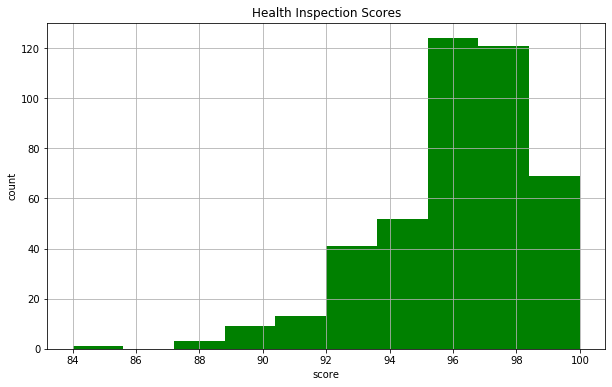

In [22]:
df2.hist('score', bins = 10, figsize = (10, 6), color = 'green')
plt.xlabel('score')
plt.ylabel('count')
title = plt.title('Health Inspection Scores')

In [23]:
df2['score'].mean()

96.05080831408776

I decided to use a bar graph to depict the health inspection scores. The scores are from the 14 cities that were represented in my final dataframe (df2): Raleigh, Cary, Morrisville, Wake Forst, Fuquay-varina, Apex, Knightdale, Garner, Zebulon, Holly Springs, Wendell, New Hill, Rolesville, and Clayton. The x-axis is the health scores and the y-axis are the number of restaurants, so the graph shows how many restaurants have that score. As we can see, there are a lot more restaurants that scored between 95-98, average being 96.

#### Last Inspection

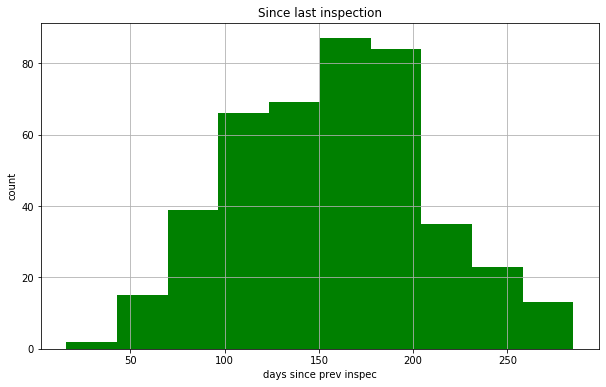

In [24]:
df2.hist('days since prev inspec', bins = 10, figsize = (10,6), color = 'green')
plt.xlabel('days since prev inspec')
plt.ylabel('count')
title = plt.title('Since last inspection')

In [25]:
df2['days since prev inspec'].mean()

157.00461893764435

I used a bargraph to also depict the days since the previous inspection. As stated in the beginning, restaurants should be inspected 1-3 times a year. This is means maybe up to every 90 days, depending on the health violations. The x-axis are the days since previous inspection and the y-axis is the range of where restaurants are at with their last inspection. As we can see, the average time a restaurant gets inspected is 157 days (around 5 months). 

#### Health Code Violations in Cities

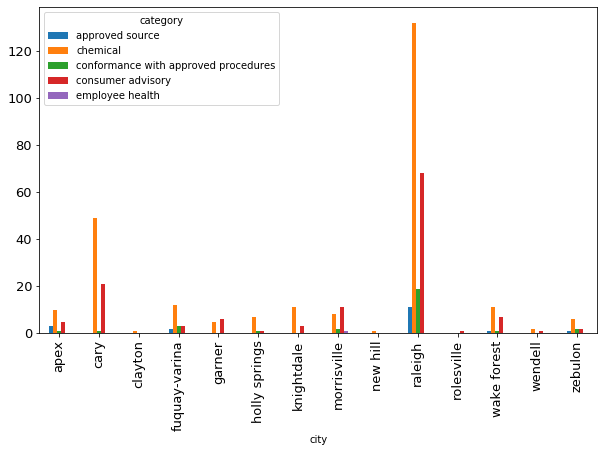

In [26]:
df2 = df2.groupby(['city', 'category']).size()
df2 = df2.unstack()
df2.plot(kind = 'bar', figsize = (10, 6), fontsize = 13)

For this graph, I used a vertical bar graph, comparing 5 series of data. The same 14 cities are displayed along the x-axis and the y-axis are the numbers of violations. The different violations found in our final dataframe (df2) are: chemical, approved source, conformance with approced procedures, consumer advisory, and employee health. We can see that Raleigh has the most violations with Cary being second. 

#### Zip Codes and Median Incomes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99319e30f0>,
      dtype=object)

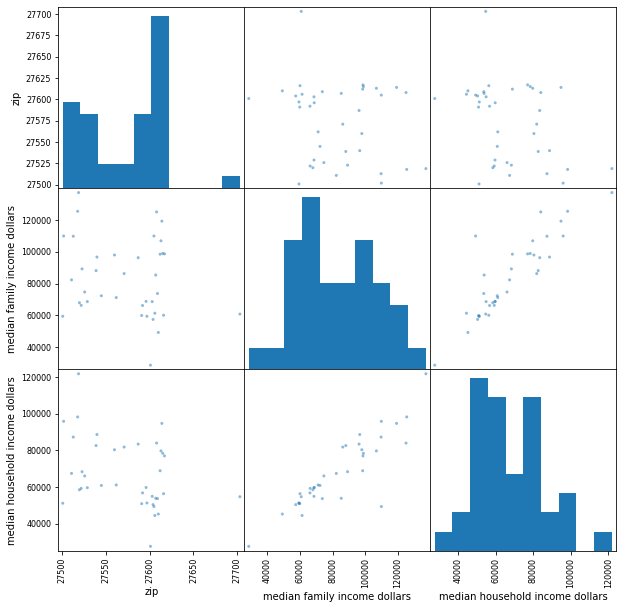

In [27]:
pd.plotting.scatter_matrix(zc[['zip', 'median family income dollars', 'median household income dollars']],
                          figsize = [10, 10])



In [28]:
zc['median family income dollars'].mean()

83039.26315789473

In [29]:
zc['median household income dollars'].mean()

67460.47368421052

I chose to use a scatter matrix for this group of dataset. We are able to see the relationships between zipcodes, median family incomes, and median household incomes. Zipcodes and Median Family Income Dollars vary between $(60,000 - 120,000), with zipcodes ranging from 27500 - 27600. I searched up these area codes and 27600 corresponds to the city Raleigh. 27550 corresponds to the cities Moorisville, New Hill, Rolesville, Wake Forest, Wendell, Garner, and Zebulon. 27500 corresponds to cities Apex, Cary, Clayton, Fuquay-varina, Holly Springs, and Knightdale. We can also see the same results for Zipcodes and Median Household Income Dollars.

***I could not figure out how to graph cities and median family income dollars, cities and median household income dollars.***

References:
- https://www.zip-codes.com/state/nc.asp

# Ethics & Privacy

The information contained in these datasets have been available for public access. Informed consent is required when using information regarding people, since the data used is regarding public domains it was not needed. However, there has been information that I chose to exclude because it was not necessary to mention and not expose restaurants for the types of violations they have. This includes name's of restaurants and phone numbers. I chose to match up restaurants not based on their names, but their hsisid's since it is what I found in common between the files. 

I tried to use the raw data and information regarding health inspection and other restaurant information. This included cities, zip codes, scores, types of violations, etc. There are other factors that contribute to health inspections that are not shown in these data sets. The purpose of this research was to explore what factors might contribute to health inspection scores based on what was given. As well as narrowing down the searches to make it easier for inspectors. I hope that by conducting this research, people can have a better understanding of how restaurants are scored and not limit the restaurants they go to based on locations. 

# Conclusion & Discussion

My projected aimed to study the relationship between health inspection scores and the location of restaurants. I hypothesized that restaurants that were located in highly populated areas were more likely to have higher inspection scores. The factors that I believed contributed to this were up to date health inspections, employees having good hygiene, and these restaurants being surrounded by higher income level families/households.

To test out my hypothesis I used the csv files inspections, restaurants, violations, and zipcodes. I chose to use information regarding hsisid's, city, violation types, median family/household incomes, days since previous inspection, scores, and more. I combined datasets and made graphs that used inspection scores, days since last inspection, and health code violations data. There were 14 cities in North Carolina that were consistent with my data: Raleigh, Cary, Morrisville, Wake Forst, Fuquay-varina, Apex, Knightdale, Garner, Zebulon, Holly Springs, Wendell, New Hill, Rolesville, and Clayton. When looking at the Health Inspection Scores graph, we can see that all these cities have high inspection scores. There wasn't a single one that fell below 80 points and the average was a 96. When doing further research, these 14 cities were in the Top 15 cities of North Carolina. So we can confirm that these highly populated cities have restaurants with high inspection scores. When looking at the Last Inspection graph, the days since the last inspection averaged to be about 157 days (~ 5 months). As mentioned in the beginning, restaurants have 1-3 inspections depending on the violations they have. This concludes that most restaurants do not have as many health violations and are keeping well with maintaining their areas. The Health Code Violation in Cities graph shows the 14 cities along with the top 5 health code violations found in the data. Raleigh and Cary were the two cities that had the most health code violations, chemical being the number 1 violation. The other cities barely even reached 5 violations. This concludes that restaurants have good employee hygiene and are keeping up with their care. My last graph of Zipcodes and Median Income shows the zipcodes of where these restaurants are located and the incomes of those around these areas. The average income for a median family is 83039, whereas for median household income was 67460. This proves that these restaurants are surrounded by families and individuals that do receive high incomes.

The thing that I would want readers to take away from this is that there are many different steps Health Departments take in order to give restaurants a score. There are many violations that I did not cover but these are the ones that my data reflected. There are other factors that were not shown in the data used but can be left up to you to ponder about.

**Limitations**

A limitation that I found was that depending on where people live, the cost of living differs by locations. How much people are getting paid by the hour differs from each location as well. With that being said, we cannot assume that everyone has the same house payments, make the same amount of income a year, or spend their money the same. No one person makes more because of the costs of living. Another limitation is that due to the way I narrowed my data, I only used 14 cities out of many in North Carolina. So my results do not reflect the state, only the cities that I looked at. There was missing information in some of these restauraunts, for that reason I dropped those restaurants and only focused on those that provided all information. My results would have been different if I decided to include other variables. 